<a href="https://colab.research.google.com/github/gakurujnr/IP_Week_9/blob/master/IP_Week_9_Titanic_And_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  TITANIC AND SPAM PROJECT

## 1. Defining the Question

###  Specifying the Data Analytic Question

Randomly partition each dataset into two parts i.e 80 - 20  sets.


For dataset 1, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

###  Recording the Experimental Design


Project 1: Predicting survival in the titanic Dataset

Loading the dataset


Exploratory Data Analysis


Visualization


Data Cleaning


Modeling: K-Nearest Neighbors Classifier (KNN)



Optimization techinques for KNN


Challenging the model: XGBoost


Conclusion

Project 2: Predicting whether an Email is a Spam or Not Spam

Loading the dataset


Exploratory Data Analysis


Visualization


Modelling: Naive Bayes Classifier: GaussianNB


Optimizing techniques for Gaussian Naive Bayes Classifier

Modelling : Naive Bayes Classifier: Bernoulli BayesNB


Recommendations


Challenging the solution: XGBoost


Conclusion

## 2. Reading the Data

### Importing Libraries 

#### Python Libraries

In [0]:
# Importing Numpy
import numpy as np


# Importing Pandas
import pandas as pd


# Importing Seaborn
import seaborn as sns


# Importing scipy from stats
from scipy import stats


# Importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#### Machine Learning Libraries

In [0]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

### Importing Data

In [34]:
# Loading the Data from the source i.e. csv
# ---

tit = pd.read_csv("train.csv")

tit.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Checking the Data

In [79]:
# Determining the no. of records in our dataset
#

print('The Titanic dataset has ', tit.shape[1], ' columns and ', tit.shape[0], ' rows!')


The Titanic dataset has  8  columns and  891  rows!


In [36]:
# results dataset

tit.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [37]:
# Checking whether each column has an appropriate datatype
#
print('Titanic dtypes:')
print(tit.dtypes)


Titanic dtypes:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [38]:
# Checking unique values and number of rows asigned for each column in the dataset

for i in tit.columns:
  
  print('\n')
  
  print(tit[i].value_counts()) 



891    1
293    1
304    1
303    1
302    1
301    1
300    1
299    1
298    1
297    1
296    1
295    1
294    1
292    1
306    1
291    1
290    1
289    1
288    1
287    1
286    1
285    1
284    1
283    1
282    1
281    1
305    1
307    1
279    1
321    1
      ..
561    1
560    1
584    1
585    1
586    1
587    1
610    1
609    1
608    1
607    1
606    1
605    1
604    1
603    1
602    1
601    1
600    1
599    1
598    1
597    1
596    1
595    1
594    1
593    1
592    1
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Nirva, Mr. Iisakki Antino Aijo                                                        1
Saalfeld, Mr. Adolphe                                                                 1
Romaine, Mr. Charles Hallace ("Mr C Rolmane")                                         1
Johannesen-Bratthammer, Mr. Bernt

## 4. Tidying the Dataset

In [39]:
tit.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

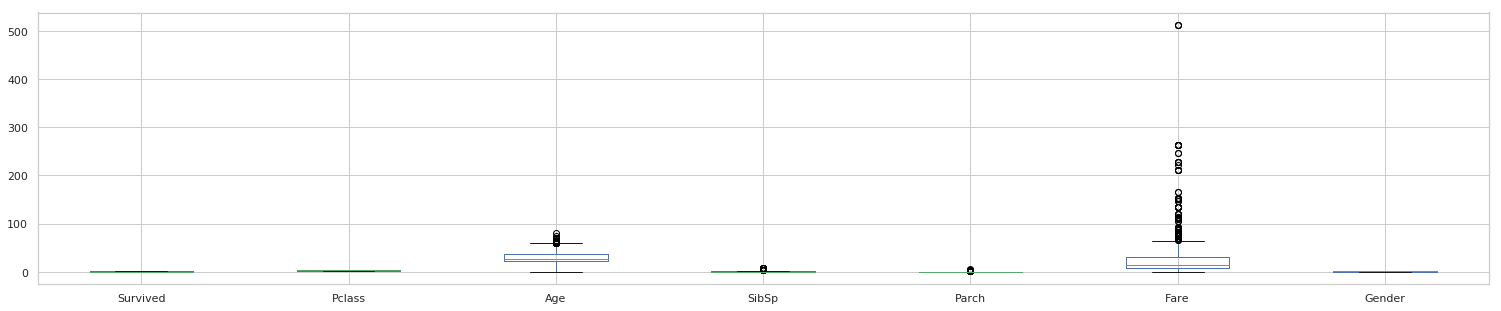

<Figure size 432x288 with 0 Axes>

In [135]:
# Checking for Outliers for fifa ranking dataset
#
%matplotlib inline

cols = [col for col in tit.columns if col not in ['Travellers Survived']]
tit[cols].plot.box(figsize=(26,5))

plt.show()
plt.tight_layout()

Age, SibSp, Parch and Fare have outliers but we won't drop the outliers as it may alter our prediction

In [41]:
# Checking for Anomalies
#

tit.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
# Identifying existence and sum of missing data in the dataset

tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have missing values in age, cabin and embarked columns we first have to deal with them

In [43]:
## Total missing values
tit.isnull().sum().sum()

866

This is the total sum of missing values in the dataset

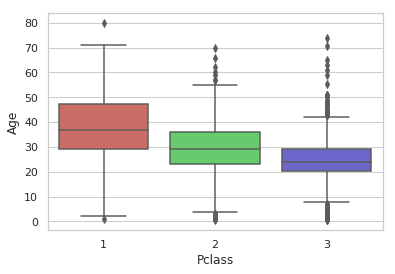

In [134]:
# Imputing missing values
# ---
# Let's look at how passenger age is related to their class as a passenger on the boat.
#
sns.boxplot(x = 'Pclass', y = 'Age', data = tit, palette='hls')
plt.title('')
plt.show()

In [0]:
## Dealing with age missing values using the Pclass
## 

def age_approx(cols):
  
  Age = cols[0]
  Pclass = cols[1]
  
  if pd.isnull(Age): 
    
    if Pclass == 1:
      
      return 37
    
    elif Pclass == 2:
      
      return 29
    
    else:
      return 24
    
  else:
      return Age

In [45]:
# When we apply the function and check again for null values, we see that there are no more null values in the age variable.
#
tit['Age'] = tit[['Age', 'Pclass']].apply(age_approx, axis = 1)
tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
## Total number of dataset
len(tit)

891

In [0]:
 ##  Converting sex column into numerical variable 1 = Male and 0 = female
def Sex(Gender):
    if Gender == 'male':
        return 1
    elif Gender == 'female':
        return 0

In [0]:
## Applying the function above
tit['Gender'] = tit['Sex'].apply(lambda Gender: Sex(Gender))

In [49]:
tit.Gender.unique()

array([1, 0])

In [0]:
tit = tit.drop(['Sex'], 1)


In [51]:
## confirming the columns if sex columns has dropped
tit.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Gender'],
      dtype='object')

In [52]:
tit.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Gender           int64
dtype: object

In [0]:
## Converting the Embarked column to categorical
tit.Embarked = tit.Embarked.astype('category') 

In [0]:
# Filling every column with its own most frequent value you can use

tit = tit.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [55]:
## Confirming there is no null values in the dataset
tit.isnull().sum().sum()

## Confirmed that null values have been dropped

0

In [56]:
## Dropping irrelevant variables
tit = tit.drop(['PassengerId', 'Name', 'Ticket' , 'Cabin'], axis = 1)
tit.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Gender'],
      dtype='object')

In [57]:
tit.dtypes

Survived       int64
Pclass         int64
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
Gender         int64
dtype: object

## 5. Exploratory Analysis

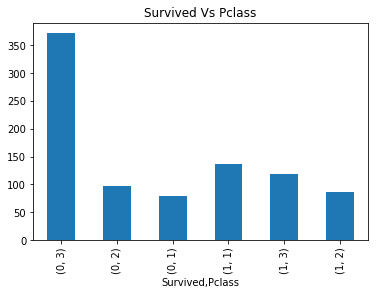

In [59]:
tit.groupby('Survived')['Pclass'].value_counts().plot.bar()
plt.title('Survived Vs Pclass')
plt.show()

The bar graph above shows Survived = 1 and Died = 0, also Pclass = 1, Pclass = 2 and Pclass = 3 with how they survived.

We clearly see that in Pclass 3 the 0 were majority that means many people Died as it goes on and on.


In Pclass 1 many people Survived 1 as it goes on and on to Pclass = 3 with less people Surviving

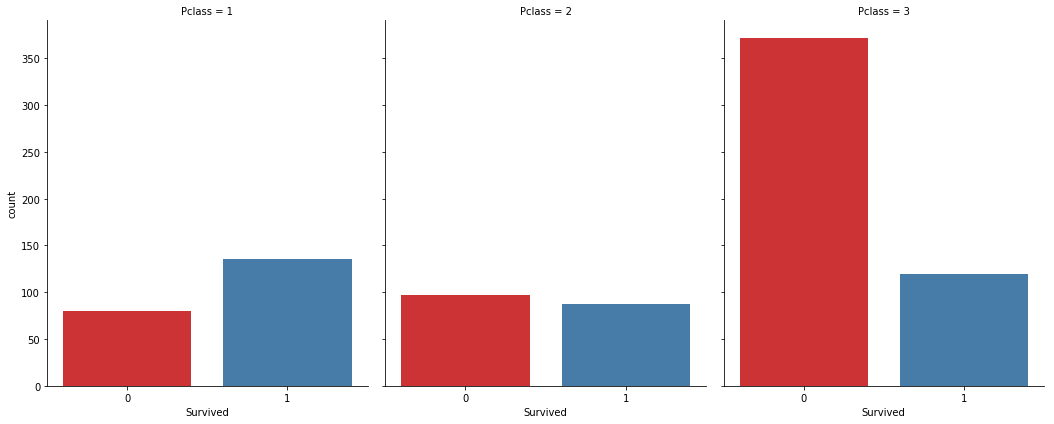

In [60]:
# Plotting bar charts
#
sns.catplot("Survived", col="Pclass", col_wrap=4, data = tit, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

From the above chart we see these observations;

The dataset is highly imbalanced. 

According to the dataset, we see 1 means Survived and 0 means Died  there are more who Died in Pclass 3 than in Pclass 1.

This means if you were in Pclass 1 you were likely to Survive

### Performing Standard Scaler

### Testing our Machine Learning Model

#### Splitting Data Target & Feature sets

In [61]:
tit.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Gender'],
      dtype='object')

In [0]:
# Splitting our data
# ---
# 
#  separing the x from the tit dataset.   I'll dropp my target column which is 'Survived'
sep = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Gender']

Z = tit[sep]

X = pd.get_dummies(Z)

y = tit['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 10)

In [0]:
# Normalizing the data

# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
# Training our algorithm
# ---
# 

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 10)

classifier.fit(X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [66]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Confusion Matrix is :', confusion_matrix(y_test, y_pred))

print('Accuracy Score is :', accuracy_score(y_test, y_pred) * 100) 


Confusion Matrix is : [[106  11]
 [ 18  44]]
Accuracy Score is : 83.79888268156425


The confusion Matrix predicts 106 survived and 44 Died which is not bad according to our model its not far from the truth.

The accuracy Score is good and can be considered for prediction.



The model is good and can be used for prediction.

In [67]:
 ##
## Splitting our data the data set 70 -30
# ---
# 
#  separing the x from the tit dataset.   I'll dropp my target column which is 'Survived'
sep = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Gender']

Z = tit[sep]

x = pd.get_dummies(Z)

Y = tit['Survived'].values

accuracy = []

for k in range(1,9):
  
 ## Split data into train and test sets
 x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3, random_state = 10)
  
  
  
 ## Standardise data
 Scaler = StandardScaler()
 x_train = Scaler.fit_transform(x_train)
 x_test = Scaler.transform(x_test)
  
 ## Applying KNN
 knn = KNeighborsClassifier(k)
 knn.fit(x_train, Y_train)

 ##Predicting the X_test data
 y_pred1 = knn.predict(x_test)

 ## Testing the accuracy of our predictions
 acc = accuracy_score(Y_test ,y_pred1)

 accuracy.append(acc)

## Creating a dataframe of the accuracy score at different levels
predict = pd.DataFrame({'My Accuracy is ': accuracy},index = range(1,9))
print(predict)

   My Accuracy is 
1         0.738806
2         0.798507
3         0.817164
4         0.824627
5         0.817164
6         0.817164
7         0.820896
8         0.824627


As the k values increases so as the accuracy increases.

Spliting the dataset into 70 - 30 does not have that big change of margin in the accuracy and when you change the random_state by increasing it the accuracy improves

In [68]:
##
## Splitting our data into 60 -  40
# ---
# 
#  separing the x from the tit dataset.   I'll dropp my target column which is 'Survived'
sep = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Gender']

Z = tit[sep]

x = pd.get_dummies(Z)

Y = tit['Survived'].values

accuracy = []

for k in range(1,9):
  
 ## Split data into train and test sets
 x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.4, random_state = 10)
  
  
  
 ## Standardise data
 Scaler = StandardScaler()
 x_train = Scaler.fit_transform(x_train)
 x_test = Scaler.transform(x_test)
  
 ## Applying KNN
 knn = KNeighborsClassifier(k)
 knn.fit(x_train, Y_train)

 ##Predicting the X_test data
 y_pred2 = knn.predict(x_test)

 ## Testing the accuracy of our predictions
 acc = accuracy_score(Y_test ,y_pred2)

 accuracy.append(acc)

## Creating a dataframe of the accuracy score at different levels
predicting = pd.DataFrame({'My Accuracy is ': accuracy},index = range(1,9))
print(predicting)

   My Accuracy is 
1         0.733894
2         0.795518
3         0.792717
4         0.809524
5         0.815126
6         0.815126
7         0.803922
8         0.809524


When we use 60 as our train size and 40 as our test size the model improves then drops as the k value increases

Though there is no big difference with the others.





I will consider the 80 - 20 train test split as it has a higher accuracy than the rest

##  Challenging the solution

In [69]:
#predicting with xgboost

model = XGBClassifier(n_estimators = 100, learning_rate = 0.25)

model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [70]:
# Calculating Feature Importance

print(model.feature_importances_)

importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})

importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances

[0.23388647 0.03347538 0.07707696 0.01771197 0.03233571 0.52673703
 0.01738521 0.01158979 0.04980151]


,importance
feature,
Gender,0.527
Pclass,0.234
SibSp,0.077
Embarked_S,0.050
Age,0.033
Fare,0.032
Parch,0.018
Embarked_C,0.017
Embarked_Q,0.012


In [0]:
# make predictions for test data

y_pred1 = model.predict(X_test)

predictions = [round(value) for value in y_pred1]

In [72]:
# Model Accuracy

print('Accuracy is :', model.score(X, y) * 100)

Accuracy is : 91.02132435465768


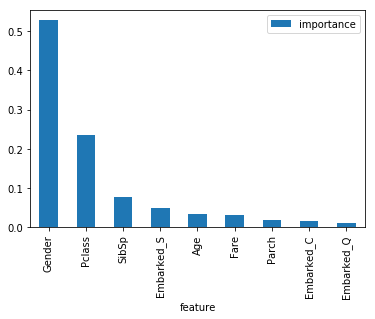

In [73]:
# Feature Importance Visualization

importances.plot.bar()

plt.show()

According to the plotted graph shown above it shows us the feature importance of the our predictor variable from the most important to the list important

## 8. Follow up questions

### a). Did we have the right data?

> Yes, but more data will work better 

### b). Do we need other data to answer our question?

> Yes, a lot of data to improve our accuracy when using this specific model

### c). Did we have the right question?

> No, the question could be diverse instead of enclosing or being specific on a particular model.

## Conclusion

> My conclusion is more data needed to give more accuracy on the model, the question could also be diverse in order for one to be able to use different models.

I challenged my model with XGBoost an gave me an accuracy of 91.02132435465768   which is far much better than our KNN accuracy of 82.12290502793296

# Naive Bayes Classifier



#### For dataset 2, perform classification of the testing set samples using the Naive Bayes Classifier.

In [74]:
mail = pd.read_csv("spambase.csv", names = ['column1','column2','column3','column4','column5','column6','column7','column8','column9',
                                            'column10','column11','column12','column13','column14','column15','column16','column17','column18',
                                            'column19','column20','column21','column22','column23','column24','column25','column26','column27','column28',
                                            'column29','column30','column31','column32','column33','column34','column35','column36','column37','column38',
                                            'column39','column40','column41','column42','column43','column44','column45','column46','column47','column48','column49',
                                            'column50','column51','column52','column53','column54','column55','column56','column57','Mail'])
mail.head()

,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10,column11,column12,column13,column14,column15,column16,column17,column18,column19,column20,column21,column22,column23,column24,column25,column26,column27,column28,column29,column30,column31,column32,column33,column34,column35,column36,column37,column38,column39,column40,column41,column42,column43,column44,column45,column46,column47,column48,column49,column50,column51,column52,column53,column54,column55,column56,column57,Mail
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Checking tha Dataset

In [78]:
## Checking the columns
mail.columns

Index(['column1', 'column2', 'column3', 'column4', 'column5', 'column6',
       'column7', 'column8', 'column9', 'column10', 'column11', 'column12',
       'column13', 'column14', 'column15', 'column16', 'column17', 'column18',
       'column19', 'column20', 'column21', 'column22', 'column23', 'column24',
       'column25', 'column26', 'column27', 'column28', 'column29', 'column30',
       'column31', 'column32', 'column33', 'column34', 'column35', 'column36',
       'column37', 'column38', 'column39', 'column40', 'column41', 'column42',
       'column43', 'column44', 'column45', 'column46', 'column47', 'column48',
       'column49', 'column50', 'column51', 'column52', 'column53', 'column54',
       'column55', 'column56', 'column57', 'Mail'],
      dtype='object')

In [90]:
## Checking information of the dataset
mail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4030 entries, 0 to 4600
Data columns (total 58 columns):
column1     4030 non-null float64
column2     4030 non-null float64
column3     4030 non-null float64
column4     4030 non-null float64
column5     4030 non-null float64
column6     4030 non-null float64
column7     4030 non-null float64
column8     4030 non-null float64
column9     4030 non-null float64
column10    4030 non-null float64
column11    4030 non-null float64
column12    4030 non-null float64
column13    4030 non-null float64
column14    4030 non-null float64
column15    4030 non-null float64
column16    4030 non-null float64
column17    4030 non-null float64
column18    4030 non-null float64
column19    4030 non-null float64
column20    4030 non-null float64
column21    4030 non-null float64
column22    4030 non-null float64
column23    4030 non-null float64
column24    4030 non-null float64
column25    4030 non-null float64
column26    4030 non-null float64
column27 

Shows there is no null values and the dtypes of the dataset which are floats and integers

In [77]:
## Checking the shape of the dataset
mail.shape

(4601, 58)

In [80]:
# Determining the no. of records in our dataset
#

print('The Spam dataset has ', mail.shape[1], ' columns and ', mail.shape[0], ' rows!')

The Spam dataset has  58  columns and  4601  rows!


In [81]:
# Checking whether each column has an appropriate datatype
#
print('Spam dtypes:')
print(mail.dtypes)

Spam dtypes:
column1     float64
column2     float64
column3     float64
column4     float64
column5     float64
column6     float64
column7     float64
column8     float64
column9     float64
column10    float64
column11    float64
column12    float64
column13    float64
column14    float64
column15    float64
column16    float64
column17    float64
column18    float64
column19    float64
column20    float64
column21    float64
column22    float64
column23    float64
column24    float64
column25    float64
column26    float64
column27    float64
column28    float64
column29    float64
column30    float64
column31    float64
column32    float64
column33    float64
column34    float64
column35    float64
column36    float64
column37    float64
column38    float64
column39    float64
column40    float64
column41    float64
column42    float64
column43    float64
column44    float64
column45    float64
column46    float64
column47    float64
column48    float64
column49    float64
column5

In [82]:
# Checking unique values and number of rows asigned for each column in the dataset

for i in mail.columns:
  
  print('\n')
  
  print(mail[i].value_counts()) 



0.00    3548
0.10      51
0.09      41
0.17      38
0.08      34
0.05      27
0.07      22
0.06      20
0.34      20
0.33      19
0.43      17
0.14      17
0.12      16
0.26      16
0.16      16
0.23      16
0.19      16
0.27      15
0.11      14
0.13      14
0.18      14
0.32      14
0.15      13
0.47      13
0.46      13
0.49      13
0.39      13
0.51      13
0.40      13
0.31      13
        ... 
1.16       1
4.34       1
1.07       1
1.14       1
1.08       1
4.00       1
3.03       1
1.88       1
1.75       1
1.11       1
0.81       1
1.42       1
1.09       1
4.54       1
1.12       1
0.83       1
0.88       1
2.35       1
1.44       1
3.84       1
1.61       1
1.49       1
3.94       1
1.31       1
1.36       1
1.39       1
2.85       1
2.43       1
0.61       1
1.01       1
Name: column1, Length: 142, dtype: int64


0.00     3703
14.28      35
0.08       27
0.10       24
0.17       24
0.19       24
0.20       21
0.26       20
0.39       17
0.49       17
0.16       17
0.28    

In [84]:
## Checking for description of the dataset
mail.describe()

,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10,column11,column12,column13,column14,column15,column16,column17,column18,column19,column20,column21,column22,column23,column24,column25,column26,column27,column28,column29,column30,column31,column32,column33,column34,column35,column36,column37,column38,column39,column40,column41,column42,column43,column44,column45,column46,column47,column48,column49,column50,column51,column52,column53,column54,column55,column56,column57,Mail
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.10000

In [85]:
## Checking for null values
mail.isnull().sum()

column1     0
column2     0
column3     0
column4     0
column5     0
column6     0
column7     0
column8     0
column9     0
column10    0
column11    0
column12    0
column13    0
column14    0
column15    0
column16    0
column17    0
column18    0
column19    0
column20    0
column21    0
column22    0
column23    0
column24    0
column25    0
column26    0
column27    0
column28    0
column29    0
column30    0
column31    0
column32    0
column33    0
column34    0
column35    0
column36    0
column37    0
column38    0
column39    0
column40    0
column41    0
column42    0
column43    0
column44    0
column45    0
column46    0
column47    0
column48    0
column49    0
column50    0
column51    0
column52    0
column53    0
column54    0
column55    0
column56    0
column57    0
Mail        0
dtype: int64

The dataset has no missing values

In [86]:
## Checking for duplicate values
mail.duplicated().sum()


391

Has duplicate values, I drop the duplicate values as it has no significance

In [0]:
# dropping duplicate values
mail.drop_duplicates(keep=False,inplace=True)

In [88]:
# confirming if the duplicate values have been dropped
mail.duplicated().sum()

0

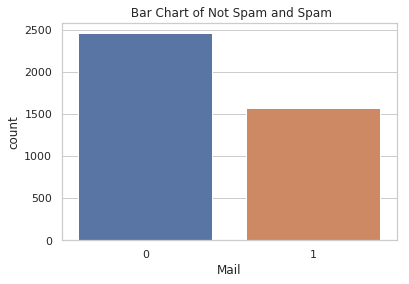

In [133]:
## Countplot for the target variable Not Spam and Spam
sns.countplot(mail.Mail)
plt.title(" Bar Chart of Not Spam and Spam")
plt.show()

The bar chart shows that Not Spam = 0 is more than Spam = 1, even though its more the difference is quite okay

## Gaussian Naive Bayes Classifier

In [0]:
## Splitting the dataset x and y

X = mail.iloc[:,:57
            ]

y = mail.iloc[:,-1]

In [0]:
## Splitting the dataset to train and test
##
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 20)

In [0]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [99]:
# Predicting our test predictors
predicted = model.predict(X_test)

print('Gaussian Accuracy is :', np.mean(predicted == y_test) * 100)

Gaussian Accuracy is : 83.49875930521092


In [101]:
## My confusion matrix
##
print('Confusion Matrix is :', confusion_matrix(y_test, predicted))

Confusion Matrix is : [[359 117]
 [ 16 314]]


My confusion matrix shows that 359 were predicted not to be spam and 314 are spam which makes sense according to our dataset but can improve

## Gaussian Naive Bayes with test size as 0.3 and train size as 0.7

In [107]:
## Challenging my gaussian model using different random states and different test size 70 - 30
##
## Splitting the dataset x and y

X = mail.iloc[:,:57
            ]

y = mail.iloc[:,-1]

## Splitting the dataset to train and test
##
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 10)

# Training our model
# 
clf = GaussianNB()  
model1 = clf.fit(X_train, y_train) 

# Predicting our test predictors
predict = model1.predict(X_test)

print('Gaussian Accuracy is :', np.mean(predict == y_test) * 100)

## My confusion matrix
##
print('Confusion Matrix is :', confusion_matrix(y_test, predict))

Gaussian Accuracy is : 84.36724565756823
Confusion Matrix is : [[552 161]
 [ 28 468]]


When you change the test size and the random size you decresase there is a slight improvement from accuracy of 83.49875930521092 to 84.36724565756823, this tells us that when you change the two accuracy increases

The same happens to confusion matrix where it predicts more Spam and not spam which works better than when using 0.2 as our test size

## Gaussian Naive Bayes with test size as 0.4 and train size as 0.6

In [106]:
## Challenging my gaussian model using different random states and different test size 60 - 40
##
## Splitting the dataset x and y

X = mail.iloc[:,:57
            ]

y = mail.iloc[:,-1]

## Splitting the dataset to train and test
##
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = 5)

# Training our model
# 
clf = GaussianNB()  
model2 = clf.fit(X_train, y_train) 

# Predicting our test predictors
pred = model2.predict(X_test)

print('Gaussian Accuracy is :', np.mean(pred == y_test) * 100)

## My confusion matrix
##
print('Confusion Matrix is :', confusion_matrix(y_test, pred))

Gaussian Accuracy is : 84.7394540942928
Confusion Matrix is : [[768 209]
 [ 37 598]]


When using 0.4 as our test size there is a slight improvement in accuracy from 84.36724565756823 to accuracy of 84.7394540942928 which is better than the two. This states that there is improvement as test size increases

There is also improvement in the confusion matrix where not spam increases as well as spam mails increases 

## Bernoulli Naive Bayes Classifier

## Test Size of 0.2 and Train Size 0.8

In [0]:
# Importing necessary libraries
# 

from sklearn.naive_bayes import BernoulliNB

In [117]:
## Splitting the dataset x and y

X1 = mail.iloc[:,:57
            ]

y1 = mail.iloc[:,-1]

## Splitting the dataset to train and test and using test size as 0.2 and random state as 5
##
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = .2, random_state = 5)

# Training our Bernoulli Naive Bayes Classifier
# 
# Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
bn = BernoulliNB()

# Train model by fitting the x and the y
Model = bn.fit(X1, y1)

# model score
accuracy = Model.score(X1, y1)
print('My Bernoulli Accuracy is :', accuracy)

My Bernoulli Accuracy is : 0.8895781637717122


My Bernoulli Accuracy is : 0.8895781637717122 which is far much better than the Gaussian accuracy

I will consider Bernoulli more than Gaussian in my prediction

### Test Size of 0.3 and Train Size 0.7

In [118]:
## Splitting the dataset x and y

X1 = mail.iloc[:,:57
            ]

y1 = mail.iloc[:,-1]

## Splitting the dataset to train and test and using test size as 0.3 and random state as 20
##
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = .3, random_state = 20)

# Training our Bernoulli Naive Bayes Classifier
# 
# Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
bn = BernoulliNB()

# Train model by fitting the x and the y
Model1 = bn.fit(X1, y1)

# model score
accuracy = Model1.score(X1, y1)
print('My Bernoulli Accuracy is :', accuracy)

My Bernoulli Accuracy is : 0.8895781637717122


When you change the test size it does not affect anything the accuracy remains constant as  0.8895781637717122 which can be seen as 88.96%

Test Size of 0.4 and Train Size 0.6

In [119]:
## Splitting the dataset x and y

X1 = mail.iloc[:,:57
            ]

y1 = mail.iloc[:,-1]

## Splitting the dataset to train and test and using test size as 0.3 and random state as 30
##
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = .4, random_state = 0)

# Training our Bernoulli Naive Bayes Classifier
# 
# Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
bn = BernoulliNB()

# Train model by fitting the x and the y
Model2 = bn.fit(X1, y1)

# model score
Accuracy = Model2.score(X1, y1)
print('My Bernoulli Accuracy is :', Accuracy)

My Bernoulli Accuracy is : 0.8895781637717122


When you change the test size it does not affect anything the accuracy remains constant as 0.8895781637717122 which can be seen as 88.96%

## Challenging the Solution

In [120]:
#predicting with xgboost

Model3 = XGBClassifier(n_estimators = 100, learning_rate = 0.25)

## Fitting our model in the x and y variables
Model3.fit(X1, y1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [128]:
# Calculating Feature Importance

print(Model3.feature_importances_)

importance = pd.DataFrame({'feature':X1.columns,'importance':np.round(Model3.feature_importances_,3)})

importance = importance.sort_values('importance',ascending=False).set_index('feature')

ten = importance.head(10)

[0.0016675  0.00855306 0.00283547 0.00310687 0.02086057 0.00509123
 0.11682514 0.0128478  0.00136141 0.00522006 0.00750012 0.00565831
 0.00517208 0.00632256 0.00377192 0.02803738 0.0142614  0.00532742
 0.00411    0.00484863 0.02574555 0.0076321  0.02005261 0.02071698
 0.06454857 0.00960082 0.03521434 0.0207196  0.00495813 0.00597522
 0.         0.         0.00218808 0.         0.00430579 0.00410118
 0.02132891 0.         0.00426038 0.         0.00429574 0.01539745
 0.00322485 0.00565905 0.01087338 0.02781918 0.         0.00613494
 0.00536586 0.00264365 0.0052943  0.09646967 0.23699814 0.00379954
 0.0238527  0.02928226 0.00816216]


In [0]:
# make predictions for test data

y1_pred = Model3.predict(X1_test)

predicting = [round(value) for value in y1_pred]

In [124]:
# Model Accuracy

print('Accuracy is :', Model3.score(X1, y1) * 100)

Accuracy is : 97.56823821339951


My XGBoost accuracy is 97.56823821339951

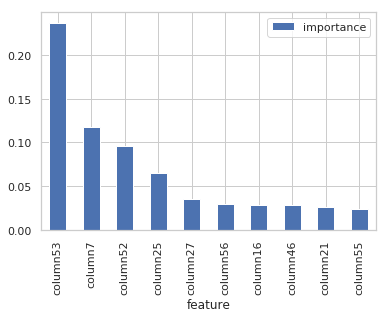

In [130]:
# Feature Importance Visualization

sns.set(style = 'whitegrid', context = 'notebook')
ten.plot.bar()

plt.show()

This shows the most important features in the datset which had the difference as shown above

## Conclusion 

BernoulliNB is the best model for prediction as it has an accuracy of 0.8895781637717122 and GaussiaNB has an accuracy of 84.7394540942928 so I would consider it in building modelling.

We could also improve the accuracy if the dimensions of the data could be reduced, as one could visualize but could not get any reasonable information.

Also when challenging the solution I noticed that XGboost could be the best in the prediction or building of this Model

